In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
df.describe(include="all")

,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


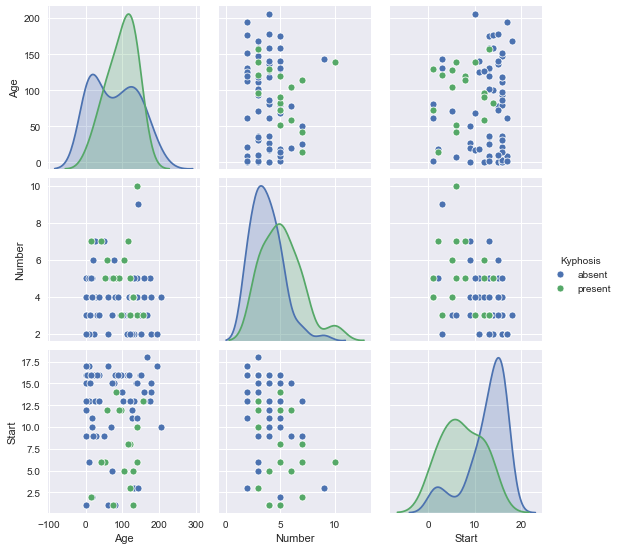

In [8]:
sns.pairplot(df,hue="Kyphosis")

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("Kyphosis",axis=1)
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [12]:
y=df["Kyphosis"]
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predictions = dtree.predict(X_test)

In [19]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[16  3]
 [ 5  1]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.76      0.84      0.80        19
     present       0.25      0.17      0.20         6

    accuracy                           0.68        25
   macro avg       0.51      0.50      0.50        25
weighted avg       0.64      0.68      0.66        25



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
rfc_predictions = rfc.predict(X_test)

In [37]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [38]:
print(confusion_matrix(y_test,rfc_predictions))

[[19  0]
 [ 5  1]]


In [57]:
error_rate=[]
initial_estimators=300
for i in range(1,initial_estimators):
    #X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    rfc_i = RandomForestClassifier(n_estimators=i)
    rfc_i.fit(X_train,y_train)
    predictor_i = rfc_i.predict(X_test)
    error_rate.append(np.mean(predictor_i != y_test))



In [58]:
error_rate

[0.2,
 0.12,
 0.2,
 0.12,
 0.12,
 0.2,
 0.16,
 0.12,
 0.28,
 0.16,
 0.12,
 0.16,
 0.2,
 0.12,
 0.16,
 0.12,
 0.08,
 0.2,
 0.12,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.2,
 0.2,
 0.12,
 0.12,
 0.08,
 0.04,
 0.08,
 0.08,
 0.16,
 0.04,
 0.12,
 0.08,
 0.08,
 0.2,
 0.16,
 0.16,
 0.12,
 0.08,
 0.08,
 0.12,
 0.12,
 0.16,
 0.08,
 0.12,
 0.12,
 0.12,
 0.16,
 0.2,
 0.12,
 0.16,
 0.12,
 0.08,
 0.08,
 0.16,
 0.16,
 0.16,
 0.08,
 0.12,
 0.12,
 0.12,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.08,
 0.16,
 0.12,
 0.16,
 0.12,
 0.12,
 0.16,
 0.12,
 0.12,
 0.04,
 0.12,
 0.12,
 0.12,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.2,
 0.12,
 0.08,
 0.12,
 0.12,
 0.12,
 0.16,
 0.08,
 0.16,
 0.12,
 0.08,
 0.12,
 0.16,
 0.12,
 0.12,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.04,
 0.12,
 0.08,
 0.16,
 0.12,
 0.08,
 0.16,
 0.16,
 0.12,
 0.16,
 0.16,
 0.16,
 0.12,
 0.12,
 0.16,
 0.2,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.16,
 0.12,
 0.16,
 0.12,
 0.12,
 0.16,
 0.16,
 0.2,
 0.16,
 0.12,
 0.16,
 0.0

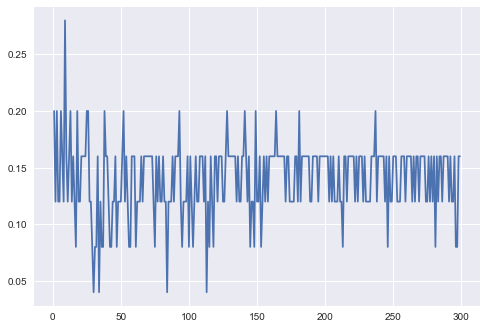

In [59]:
plt.plot(range(1,initial_estimators),error_rate)

In [61]:
new_error_rate=np.array(error_rate)

In [64]:
print("number of estimetor: ",new_error_rate.argmin())

number of estimetor:  29


In [66]:
print("minumum error: ",new_error_rate[new_error_rate.argmin()]*100,"%")

minumum error:  4.0 %
